## Sistemas de Recomendaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model

from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("../Data/ratings.csv")

df

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496
...,...,...,...,...
22884372,247753,49530,5.0,1430437962
22884373,247753,69481,3.0,1430437984
22884374,247753,74458,4.0,1430437968
22884375,247753,76093,5.0,1430437811


In [3]:
user_ids = {user_id : num for num, user_id in enumerate(df["userId"].unique())}

user_ids

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [4]:
df["userId"] = df["userId"].map(user_ids)

In [5]:
movie_ids = {movie_id : num for num, movie_id in enumerate(df["movieId"].unique())}

movie_ids

{169: 0,
 2471: 1,
 48516: 2,
 2571: 3,
 109487: 4,
 112552: 5,
 112556: 6,
 356: 7,
 2394: 8,
 2431: 9,
 2445: 10,
 16: 11,
 39: 12,
 45: 13,
 47: 14,
 94: 15,
 101: 16,
 246: 17,
 288: 18,
 296: 19,
 345: 20,
 357: 21,
 377: 22,
 417: 23,
 440: 24,
 457: 25,
 480: 26,
 492: 27,
 508: 28,
 527: 29,
 535: 30,
 538: 31,
 551: 32,
 562: 33,
 593: 34,
 608: 35,
 766: 36,
 778: 37,
 902: 38,
 903: 39,
 904: 40,
 908: 41,
 915: 42,
 994: 43,
 1041: 44,
 1060: 45,
 1077: 46,
 1079: 47,
 1080: 48,
 1089: 49,
 1136: 50,
 1148: 51,
 1172: 52,
 1197: 53,
 1223: 54,
 1225: 55,
 1230: 56,
 1244: 57,
 1247: 58,
 1248: 59,
 1258: 60,
 1259: 61,
 1265: 62,
 1266: 63,
 1276: 64,
 1288: 65,
 1307: 66,
 1343: 67,
 1393: 68,
 1394: 69,
 1407: 70,
 1449: 71,
 1500: 72,
 1537: 73,
 1571: 74,
 1594: 75,
 1617: 76,
 1635: 77,
 1639: 78,
 1641: 79,
 1648: 80,
 1673: 81,
 1678: 82,
 1680: 83,
 1704: 84,
 1719: 85,
 1729: 86,
 1732: 87,
 1777: 88,
 1784: 89,
 1834: 90,
 1856: 91,
 1916: 92,
 1923: 93,
 1966: 94

In [6]:
df["movieId"] = df["movieId"].map(movie_ids)

In [7]:
user_ids = df["userId"].values
movie_ids = df["movieId"].values
ratings = df["rating"].values

### Model - Recomendador

In [8]:
# User Input
user = Input(shape = (1, ))

# Movie Input
movie = Input(shape = (1, ))

# User Embedding
user_emb = Embedding(input_dim = len(user_ids), output_dim = 10)(user)
user_emb = Flatten()(user_emb)

# Movie Embedding
movie_emb = Embedding(input_dim = len(movie_ids), output_dim = 10)(movie)
movie_emb = Flatten()(movie_emb)

# Concatenate
x = Concatenate()([user_emb, movie_emb])

# Capas Densas
x = Dense(units = 1024, activation = "relu")(x)
# x = Dense(units = 512, activation = "relu")(x)
# x = Dense(units = 256, activation = "relu")(x)

# Salida
x = Dense(units = 1)(x)


model = Model(inputs = [user, movie], outputs = x)

model.compile(optimizer = "adam", loss = "mse")

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 10)        228843770   ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 10)        228843770   ['input_2[0][0]']                
                                                                                              

### Train, Test

shuffle: https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [9]:
user_ids, movie_ids, rating = shuffle(user_ids, movie_ids, ratings)

n_train = int(0.8*len(ratings))

train_user = user_ids[:n_train]
train_movie = movie_ids[:n_train]
train_ratings = ratings[:n_train]

test_user = user_ids[n_train:]
test_movie = movie_ids[n_train:]
test_ratings = ratings[n_train:]


# Normalizar ratings

mean_rating = train_ratings.mean()

train_ratings = train_ratings - mean_rating
test_ratings = test_ratings - mean_rating

In [18]:
history = model.fit(x               = [train_user, train_movie],
                    y               = train_ratings,
                    validation_data = ([test_user, test_movie], test_ratings),
                    epochs          = 2, # lo limitamos porque tarda mucho en cada época
                    batch_size      = 1024*64) # lo mismo que con las épocas cuando más pequeño sea el salto más tarda

Epoch 1/2
280/280 [==============================] - 1222s 4s/step - loss: 1.0921 - val_loss: 1.1504
Epoch 2/2
280/280 [==============================] - 1228s 4s/step - loss: 1.0698 - val_loss: 1.1665


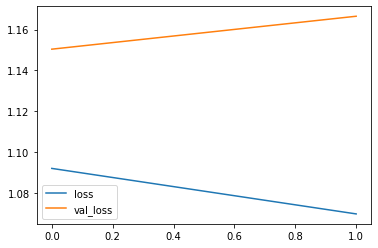

In [19]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

In [21]:
history.history

{'loss': [1.0920788049697876, 1.0698086023330688],
 'val_loss': [1.1504226922988892, 1.1665366888046265]}

In [20]:
# accuracy
plt.plot(history.history["accuracy"], label = "acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

KeyError: 'accuracy'

In [ ]:
################################################################################################################################